In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Hugo's Portfolio/Introducing NBEATSx to Realized Volatility Forecasting (Research)/S&P 500 Realized Volatility.xlsx",index_col='Date',parse_dates=True)


In [ ]:
df = pd.read_excel("S&P 500 Realized Volatility.xlsx",index_col='Date',parse_dates=True)

Hyperparameter search

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

In [ ]:
scaler = MinMaxScaler()

In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
epochs=[1,3,5,7,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []


Determining the number of inputs

In [ ]:
from numpy.random import seed
seed(1052023)

In [ ]:
from random import randrange
print(randrange(1))

0


First trial

In [ ]:
for m in range (5):
    seed(1052023)
    i=randrange(6)
    h=randrange(6)
    k=randrange(6)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/5
3445/3445 [==============================] - 21s 6ms/step - loss: 0.0375 - acc: 2.9028e-04
Epoch 2/5
3445/3445 [==============================] - 20s 6ms/step - loss: 0.0365 - acc: 2.9028e-04
Epoch 3/5
3445/3445 [==============================] - 19s 6ms/step - loss: 0.0355 - acc: 2.9028e-04
Epoch 4/5
3445/3445 [==============================] - 20s 6ms/step - loss: 0.0352 - acc: 2.9028e-04
Epoch 5/5
1/1 [==============================] - 0s 20ms/step
Epoch: 5 | Inputs: 63 | Nodes: 42 | Dropout: 0.2 | Loss: mae
RMSE: 0.0020757539366162716 | Accuracy: 68.71752071961066
1/1 [==============================] - 0s 27ms/step
Epoch: 1 | Inputs: 21 | Nodes: 168 | Dropout: 0.4 | Loss: mse
RMSE: 0.002412730617762986 | Accuracy: 65.41411607309864
Epoch 1/7
3382/3382 [==============================] - 28s 8ms/step - loss: 0.0369 - acc: 2.9568e-04
Epoch 2/7
3382/3382 [==============================] - 26s 8ms/step - loss: 0.0345 - acc: 2.9568e-04
Epoch 3/7
3382/3382 [=====================

In [ ]:
for m in range (5):
    seed(1052023)
    i=randrange(6)
    h=randrange(6)
    k=randrange(6)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

1/1 [==============================] - 0s 21ms/step
Epoch: 1 | Inputs: 63 | Nodes: 42 | Dropout: 0 | Loss: mse
RMSE: 0.0021257366708856483 | Accuracy: 66.61658541665471
Epoch 1/3
3424/3424 [==============================] - 24s 6ms/step - loss: 0.0365 - acc: 2.9206e-04
Epoch 2/3
3424/3424 [==============================] - 21s 6ms/step - loss: 0.0356 - acc: 2.9206e-04
Epoch 3/3
1/1 [==============================] - 0s 19ms/step
Epoch: 3 | Inputs: 84 | Nodes: 84 | Dropout: 0.2 | Loss: mae
RMSE: 0.0022320400825985493 | Accuracy: 68.19411884317749
Epoch 1/5
3382/3382 [==============================] - 28s 8ms/step - loss: 0.0037 - acc: 5.9137e-04
Epoch 2/5
3382/3382 [==============================] - 26s 8ms/step - loss: 0.0035 - acc: 2.9568e-04
Epoch 3/5
3382/3382 [==============================] - 26s 8ms/step - loss: 0.0034 - acc: 2.9568e-04
Epoch 4/5
3382/3382 [==============================] - 26s 8ms/step - loss: 0.0032 - acc: 2.9568e-04
Epoch 5/5
1/1 [=============================

In [ ]:
for m in range (5):
    seed(1052023)
    i=randrange(6)
    h=randrange(6)
    k=randrange(6)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
3319/3319 [==============================] - 29s 8ms/step - loss: 0.0016 - acc: 6.0259e-04
Epoch 2/3
3319/3319 [==============================] - 27s 8ms/step - loss: 0.0015 - acc: 6.0259e-04
Epoch 3/3
1/1 [==============================] - 0s 21ms/step
Epoch: 3 | Inputs: 189 | Nodes: 84 | Dropout: 0 | Loss: huber_loss
RMSE: 0.0019916510265484103 | Accuracy: 68.48623406520346
Epoch 1/5
3445/3445 [==============================] - 23s 6ms/step - loss: 0.0017 - acc: 5.8055e-04
Epoch 2/5
3445/3445 [==============================] - 21s 6ms/step - loss: 0.0016 - acc: 5.8055e-04
Epoch 3/5
3445/3445 [==============================] - 20s 6ms/step - loss: 0.0016 - acc: 5.8055e-04
Epoch 4/5
3445/3445 [==============================] - 21s 6ms/step - loss: 0.0016 - acc: 5.8055e-04
Epoch 5/5
1/1 [==============================] - 0s 25ms/step
Epoch: 5 | Inputs: 63 | Nodes: 42 | Dropout: 0 | Loss: huber_loss
RMSE: 0.0019159620792998093 | Accuracy: 69.3818802075324
1/1 [=================

In [ ]:
for m in range (5):
    seed(1052023)
    i=randrange(6)
    h=randrange(6)
    k=randrange(6)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df.iloc[int(len(df['Realised'])*0.7):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

1/1 [==============================] - 0s 19ms/step
Epoch: 1 | Inputs: 126 | Nodes: 84 | Dropout: 0.4 | Loss: mae
RMSE: 0.002499197925533186 | Accuracy: 65.59289703193505
Epoch 1/7
3319/3319 [==============================] - 30s 8ms/step - loss: 0.0031 - acc: 6.0259e-04
Epoch 2/7
3319/3319 [==============================] - 28s 8ms/step - loss: 0.0030 - acc: 6.0259e-04
Epoch 3/7
3319/3319 [==============================] - 28s 8ms/step - loss: 0.0030 - acc: 6.0259e-04
Epoch 4/7
3319/3319 [==============================] - 28s 8ms/step - loss: 0.0029 - acc: 6.0259e-04
Epoch 5/7
3319/3319 [==============================] - 29s 9ms/step - loss: 0.0029 - acc: 6.0259e-04
Epoch 6/7
3319/3319 [==============================] - 28s 9ms/step - loss: 0.0029 - acc: 6.0259e-04
Epoch 7/7
1/1 [==============================] - 0s 23ms/step
Epoch: 7 | Inputs: 189 | Nodes: 56 | Dropout: 0 | Loss: mse
RMSE: 0.00186254856172835 | Accuracy: 70.00003057249815
1/1 [==============================] - 0s 29m

Best hyperparameters

Epoch: 7 | Inputs: 189 | Nodes: 56 | Dropout: 0 | Loss: mse 

RMSE: 0.00186254856172835 | Accuracy: 70.00003057249815




# H=1 Forecasts

In [ ]:
RMSE = []
Accuracy = []

In [ ]:
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 189
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
model = Sequential()
model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=7)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(len(test)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
a=np.sqrt((test-true_predictions)**2)
a=np.delete(a,1754)
test1=np.delete(test,1754) #needed since this value equals 0
Accuracy.append((1-np.sum(a/test1)/(len(test)-1))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
3904/3904 [==============================] - 272s 69ms/step - loss: 0.0031 - accuracy: 2.5615e-04 - mean_absolute_error: 0.0359
Epoch 2/7
3904/3904 [==============================] - 266s 68ms/step - loss: 0.0027 - accuracy: 5.1230e-04 - mean_absolute_error: 0.0341
Epoch 3/7
3904/3904 [==============================] - 263s 67ms/step - loss: 0.0027 - accuracy: 2.5615e-04 - mean_absolute_error: 0.0338
Epoch 4/7
3904/3904 [==============================] - 263s 67ms/step - loss: 0.0026 - accuracy: 2.5615e-04 - mean_absolute_error: 0.0334
Epoch 5/7
3904/3904 [==============================] - 262s 67ms/step - loss: 0.0026 - accuracy: 2.5615e-04 - mean_absolute_error: 0.0334
Epoch 6/7
3904/3904 [==============================] - 264s 68ms/step - loss: 0.0026 - accuracy: 2.5615e-04 - mean_absolute_error: 0.0333
Epoch 7/7
1/1 [==============================] - 0s 61ms/step


In [ ]:
Accuracy

[64.85627712868582,
 66.43427504418052,
 59.172195214897116,
 64.23756819922066,
 63.226234746110975,
 64.7419806330318,
 64.89814336309243,
 60.641065650220895,
 66.190702833545,
 67.65389182684818,
 66.04733946512293,
 69.06539723674311,
 66.8748091155993]

In [ ]:
RMSE

[0.0024721435138656163,
 0.0024383272388189704,
 0.0025770176360965418,
 0.002480954417108067,
 0.002497813848988753,
 0.0024368902536909443,
 0.0024548047718744594,
 0.0025758751271081058,
 0.002444123059837738,
 0.00258766270657149,
 0.0024085851195776884,
 0.0024778129194693937,
 0.0026648750828492627]

In [ ]:
Quasilikelihood

[0.08790107747414885,
 0.082656391229494,
 0.10603898994198627,
 0.08839927034401202,
 0.09335869061321093,
 0.087640249749996,
 0.08753763315711215,
 0.10405355368242286,
 0.08304084926920527,
 0.09668964921702033,
 0.08364746264494981,
 0.07998766726798599,
 0.10586210034554165]

In [ ]:
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

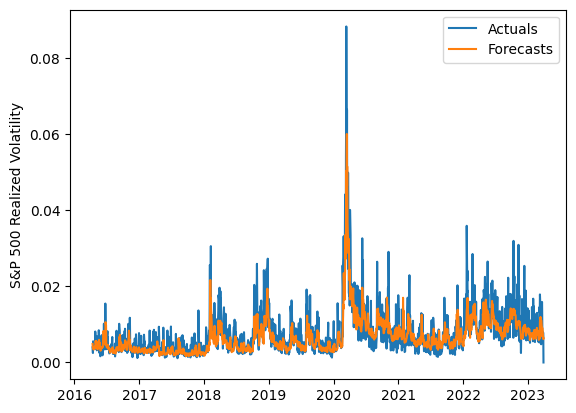

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=3 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
df=df[:len(df["Realised"])-1]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 189
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=7)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(int(len(test)/3)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,3:,:],[a[j*3:(j+1)*3]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.reshape(1755,1)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
122/122 [==============================] - 3s 9ms/step - loss: 0.0065 - accuracy: 0.0846 - mean_absolute_error: 0.0467
Epoch 2/7
122/122 [==============================] - 1s 8ms/step - loss: 0.0035 - accuracy: 0.1268 - mean_absolute_error: 0.0380
Epoch 3/7
122/122 [==============================] - 1s 8ms/step - loss: 0.0032 - accuracy: 0.1863 - mean_absolute_error: 0.0357
Epoch 4/7
122/122 [==============================] - 1s 8ms/step - loss: 0.0030 - accuracy: 0.1591 - mean_absolute_error: 0.0351
Epoch 5/7
122/122 [==============================] - 1s 8ms/step - loss: 0.0030 - accuracy: 0.1686 - mean_absolute_error: 0.0354
Epoch 6/7
122/122 [==============================] - 1s 8ms/step - loss: 0.0029 - accuracy: 0.1735 - mean_absolute_error: 0.0347
Epoch 7/7
1/1 [==============================] - 0s 19ms/step


In [ ]:
Accuracy

[57.93503222089458,
 55.65911527642299,
 54.93348012245546,
 58.84165844195207,
 52.864132150094356,
 59.119366201021386,
 50.231446442386144,
 58.73557585490187,
 57.42123365415128,
 56.33251852043182,
 60.98317814965637,
 60.8094797732341,
 61.65504589048793,
 58.20121500076647,
 47.1503960068137]

In [ ]:
RMSE

[0.002771836502893999,
 0.00280685547137493,
 0.0028110500989764605,
 0.0027327264137775665,
 0.0028836707796033893,
 0.0027365538568878923,
 0.0029593990346192156,
 0.002726463684103492,
 0.002784534684389411,
 0.0027856827192254824,
 0.0027329945843725346,
 0.0026974234833763225,
 0.00270611820092827,
 0.002740782176198386,
 0.003132890596380647]

In [ ]:
Quasilikelihood

[0.11752927925529502,
 0.12552968796077646,
 0.12789513733106245,
 0.11359527421908942,
 0.13590402344278676,
 0.11282645376196393,
 0.14513452049437073,
 0.11394014586473761,
 0.11937449636575372,
 0.12248382054811316,
 0.10795050372554095,
 0.10696753929049498,
 0.10494639538689611,
 0.11665751760308359,
 0.15925692095663263]

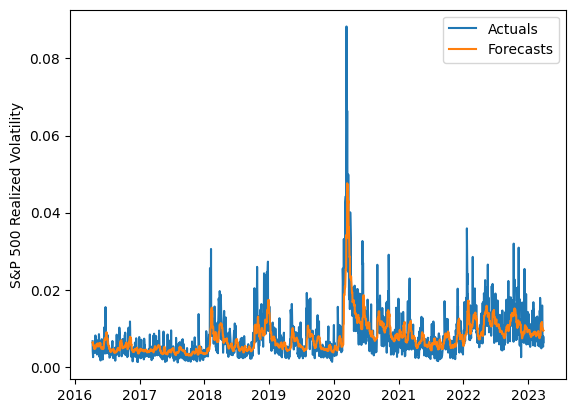

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=5 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 189
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(5))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=7)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(int(len(test)/5)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,5:,:],[a[j*5:(j+1)*5]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.reshape(1755,1)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
122/122 [==============================] - 7s 21ms/step - loss: 0.0050 - accuracy: 0.2818 - mean_absolute_error: 0.0447
Epoch 2/7
122/122 [==============================] - 2s 17ms/step - loss: 0.0035 - accuracy: 0.2569 - mean_absolute_error: 0.0381
Epoch 3/7
122/122 [==============================] - 2s 17ms/step - loss: 0.0030 - accuracy: 0.2044 - mean_absolute_error: 0.0350
Epoch 4/7
122/122 [==============================] - 2s 15ms/step - loss: 0.0030 - accuracy: 0.3343 - mean_absolute_error: 0.0347
Epoch 5/7
122/122 [==============================] - 2s 16ms/step - loss: 0.0029 - accuracy: 0.2910 - mean_absolute_error: 0.0348
Epoch 6/7
122/122 [==============================] - 2s 13ms/step - loss: 0.0029 - accuracy: 0.3507 - mean_absolute_error: 0.0347
Epoch 7/7
1/1 [==============================] - 0s 33ms/step


In [ ]:
Accuracy

[50.9393124290666,
 54.97740880076113,
 50.96647148132514,
 58.75720910013206,
 53.07273453406756,
 61.88567530246844,
 57.316877300193724,
 59.919804861373514,
 63.47822673484815,
 54.55837660726903,
 57.0990796783182,
 58.64963776612695,
 59.654773032423805,
 53.83975304268388,
 57.41587373373076]

In [ ]:
RMSE

[0.0029799342285468998,
 0.0029174046339810237,
 0.002971433841055383,
 0.002838146747497984,
 0.002919484119948184,
 0.002788861553467151,
 0.002877891028054771,
 0.0027963493216711854,
 0.0028020279945245694,
 0.002871277432557702,
 0.0028933660739642016,
 0.002814887713654131,
 0.002819951031160391,
 0.0028902207871120676,
 0.0028410624974291067]

In [ ]:
Quasilikelihood

[0.0029799342285468998,
 0.0029174046339810237,
 0.002971433841055383,
 0.002838146747497984,
 0.002919484119948184,
 0.002788861553467151,
 0.002877891028054771,
 0.0027963493216711854,
 0.0028020279945245694,
 0.002871277432557702,
 0.0028933660739642016,
 0.002814887713654131,
 0.002819951031160391,
 0.0028902207871120676,
 0.0028410624974291067]

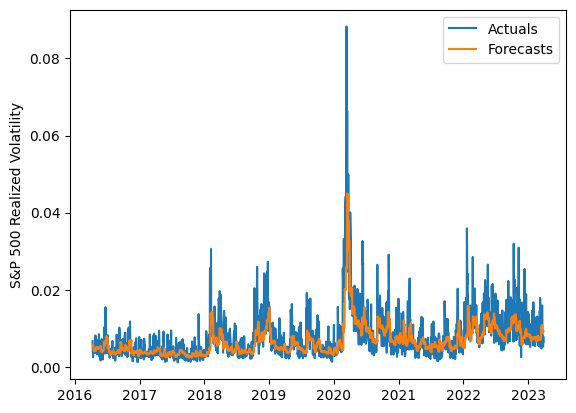

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=10 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 189
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(10))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=7)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(int(len(test)/10)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,10:,:],[a[j*10:(j+1)*10]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.reshape(1750,1)
test=test[:1750]
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
122/122 [==============================] - 3s 10ms/step - loss: 0.0040 - accuracy: 0.0523 - mean_absolute_error: 0.0402
Epoch 2/7
122/122 [==============================] - 1s 11ms/step - loss: 0.0033 - accuracy: 0.1317 - mean_absolute_error: 0.0370
Epoch 3/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0030 - accuracy: 0.0597 - mean_absolute_error: 0.0356
Epoch 4/7
122/122 [==============================] - 1s 8ms/step - loss: 0.0030 - accuracy: 0.1219 - mean_absolute_error: 0.0354
Epoch 5/7
122/122 [==============================] - 1s 8ms/step - loss: 0.0029 - accuracy: 0.0761 - mean_absolute_error: 0.0347
Epoch 6/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0028 - accuracy: 0.0517 - mean_absolute_error: 0.0342
Epoch 7/7
1/1 [==============================] - 0s 24ms/step


In [ ]:
Accuracy

[59.106597731568776,
 55.87105241486145,
 48.56567730315714,
 60.47301344526262,
 49.55543712908723,
 47.59527944384243,
 53.33090516596607,
 56.74419654925125,
 51.823676041694156,
 48.570511814274695,
 56.72484599026764,
 51.40871682375996,
 55.66075339131986,
 53.56072812031509,
 54.1397789480671]

In [ ]:
RMSE

[0.0030289523287848263,
 0.003082826686326514,
 0.0032041491165568366,
 0.0030943477720540356,
 0.003296196853912629,
 0.0033027630146629473,
 0.0031001589660276615,
 0.0030424932347645184,
 0.003144298970717941,
 0.0032692985519028428,
 0.0031426634936840498,
 0.0031228385184767075,
 0.0030840814170255727,
 0.0031513323376924085,
 0.003236058829853549]

In [ ]:
Quasilikelihood

[0.12616732342792877,
 0.13463299926171002,
 0.162924219863253,
 0.12717591853507818,
 0.1587532621318836,
 0.16562478169044872,
 0.1433287386256374,
 0.13180400132299955,
 0.1501448132991511,
 0.16194963705232823,
 0.13400361614383235,
 0.1511093520876429,
 0.13560771812327155,
 0.1432702526806324,
 0.1435071712529249]

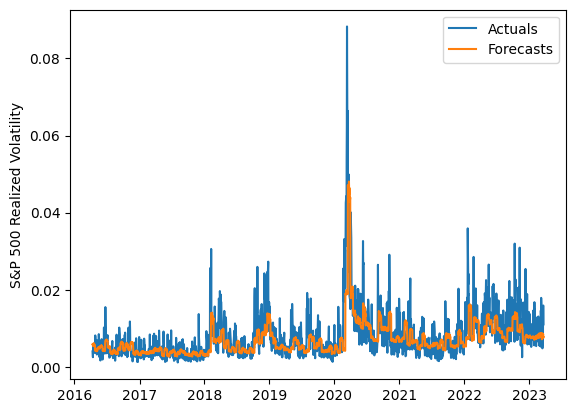

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:1750], test)
plt.plot(df_for_date["Date"][:1750], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=22 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.7)]
test = df.iloc[int(len(df['Realised'])*0.7):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 189
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(22))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=7)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(int(len(test)/22)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,22:,:],[a[j*22:(j+1)*22]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.reshape(1738,1)
test=test[:1738]
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
122/122 [==============================] - 3s 10ms/step - loss: 0.0055 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0468
Epoch 2/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.0010 - mean_absolute_error: 0.0370
Epoch 3/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0037 - accuracy: 0.0026 - mean_absolute_error: 0.0391
Epoch 4/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.0028 - mean_absolute_error: 0.0372
Epoch 5/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.0018 - mean_absolute_error: 0.0348
Epoch 6/7
122/122 [==============================] - 1s 9ms/step - loss: 0.0029 - accuracy: 0.0272 - mean_absolute_error: 0.0349
Epoch 7/7
1/1 [==============================] - 0s 23ms/step


In [ ]:
Accuracy

[46.359921957084616,
 46.840141515705646,
 51.82854285479739,
 55.06982821215066,
 59.3467419139693,
 55.63536910099042,
 54.975110480096156,
 42.144723475896306,
 49.828389211619374,
 39.60481154088497,
 46.933847180768936,
 48.54477585482121,
 52.03672183233146,
 58.80139894416574,
 47.28960826050934]

In [ ]:
RMSE

[0.0035560359013420743,
 0.0035937171425196733,
 0.0036034014532749566,
 0.0034423284222444327,
 0.003518799792425757,
 0.0034165210486708205,
 0.0035377424203380864,
 0.003974784905249811,
 0.003568968738137969,
 0.003976353369884889,
 0.00358902305282353,
 0.0036157168338706884,
 0.0035292057056356763,
 0.0034278163977691923,
 0.0036583139835558096]

In [ ]:
Quasilikelihood

[0.17601263836920714,
 0.17473646751069521,
 0.15971894732989375,
 0.1489655726711604,
 0.1498623035978201,
 0.14567973353605812,
 0.15170483058016948,
 0.19703091124815314,
 0.1648043367300956,
 0.20584380452096704,
 0.1750191777715917,
 0.17064252804043648,
 0.1580623095054481,
 0.14096745680558115,
 0.17412138557075238]

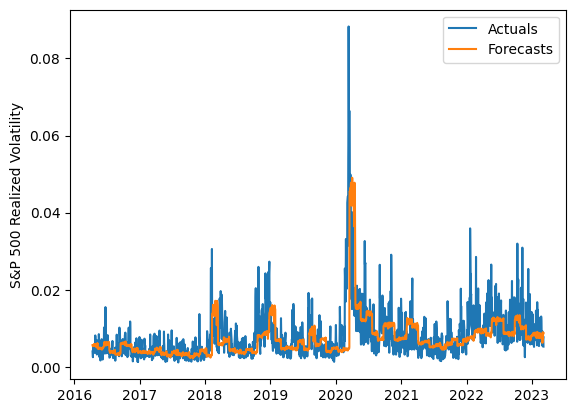

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:1738], test)
plt.plot(df_for_date["Date"][:1738], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])